In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Position_Salaries_svm.csv")

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [5]:
#apply feature scaling for X
print(X)
print("______________________________")
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
______________________________
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
#reshape(no of rows, number of columns)
y = y.reshape(len(y),1)

In [10]:
print(X)
print("-----------------------------")
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
-----------------------------
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\kumar\OneDrive\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [12]:
#do not use sc to y dataset also
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [13]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [20]:
#built and trained the svm model
from sklearn.svm import SVR
re = SVR(kernel= 'rbf')
re.fit(X, y)

C:\Users\kumar\OneDrive\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [31]:
sc_y.inverse_transform(re.predict(sc.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Text(0, 0.5, 'Salary')

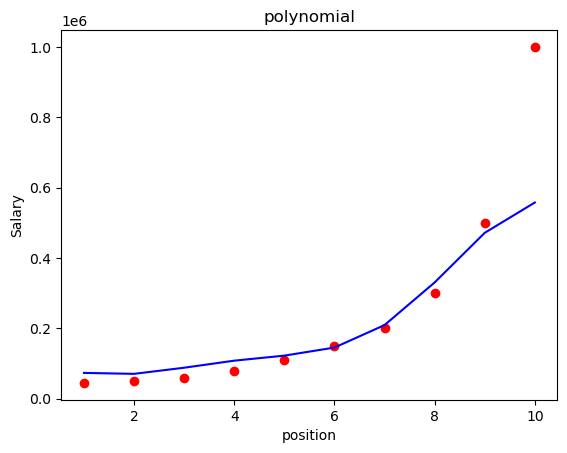

In [32]:
import matplotlib.pyplot as plt
plt.scatter(sc.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc.inverse_transform(X), sc_y.inverse_transform(re.predict(X).reshape(-1,1)), color = 'blue')
plt.title('polynomial')
plt.xlabel('position')
plt.ylabel('Salary')